In [1]:
import matplotlib.pyplot as plt

In [2]:
# Counting number of rows using spark.sql
def count(df,spark):
    return spark.sql('select count(*) as cnt from people').first().cnt

In [3]:
# Return number of columns using DataFrame API
def getNumberOfFields(df,spark):
    return len(df.columns)

In [4]:
# Returns coloumns names (a list). Implemented using DataFrame API.
def getFieldNames(df,spark):
    return df.columns

In [5]:
# Performing analysis on age attribute.Finding min Age
def minAge(df,spark):
    df=df.rdd.map(lambda x: x.age)
    return df.min()

In [6]:
# Performing analysis on age attribute.Finding max Age
def maxAge(df,spark):
    df=df.rdd.map(lambda x: x.age)
    return df.max()

In [7]:
def meanAge(df,spark):
    df=df.filter('Age is not null')
    df=df.rdd.map(lambda x: x.age)
    return df.sum()/df.count()

In [8]:
def sdTemperature(df,spark):
    return spark.sql("SELECT stddev(age) as sdage from people").first().sdage

In [9]:
# used 1/n as the normalizing factor
def skewAge(df,spark):
    df=df.filter('age is not null').rdd.map(lambda x: x.age)
    mean=df.sum()/float(df.count())
    sd=pow(df.map(lambda x: pow((x-mean),2)).sum()/float(df.count()),0.5)
    skew=df.map( lambda x: pow(x-mean,3)/pow(sd,3)).sum()/(float(df.count()))
    return skew


In [10]:
# used 1/n as the normalizing factor
def kurtosisAge(df,spark):
    df=df.filter('age is not null').rdd.map(lambda x: x.age)
    mean=df.sum()/float(df.count())
    sd=pow(df.map(lambda x: pow((x-mean),2)).sum()/float(df.count()),0.5)
    kurt=df.map( lambda x: pow(x-mean,4)/pow(sd,4)).sum()/(float(df.count()))
    return kurt 

In [11]:
def correlationAgeTarget(df,spark):
    corr=df.stat.corr('age','target')
    return corr


In [12]:
def getListForHistogramAndBoxPlot(df,spark):
    result=spark.sql("select chol from people where chol is not null")
    return result.rdd.map(lambda x:x.chol).collect()

In [ ]:

import ibmos2spark

# @hidden_cell
credentials = {
    'endpoint': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'api_key': 'A9GGg-5TRMZV-HP6Et2QaAuJ2VfCS4R_dacErpSr6Eo-',
    'service_id': 'iam-ServiceId-f550ca37-1e07-405a-8b35-c10e58ff30ca',
    'iam_service_endpoint': 'https://iam.bluemix.net/oidc/token'}

configuration_name = 'os_1048424a56314a6ea3e6f6d002008ff0_configs'
cos = ibmos2spark.CloudObjectStorage(sc, credentials, configuration_name, 'bluemix_cos')

from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
df_data_1 = spark.read\
  .format('org.apache.spark.sql.execution.datasources.csv.CSVFileFormat')\
  .option('header', 'true')\
  .load(cos.url('heart.csv', 'iot-donotdelete-pr-ighfq07zkffzgl'))
#df_data_2.take(5)


In [13]:
df_data_1.printSchema()

NameError: name 'df_data_1' is not defined

In [17]:
df_data_1.show()

+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|target|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
| 63|  1|  3|     145| 233|  1|      0|    150|    0|    2.3|    0|  0|   1|     1|
| 37|  1|  2|     130| 250|  0|      1|    187|    0|    3.5|    0|  0|   2|     1|
| 41|  0|  1|     130| 204|  0|      0|    172|    0|    1.4|    2|  0|   2|     1|
| 56|  1|  1|     120| 236|  0|      1|    178|    0|    0.8|    2|  0|   2|     1|
| 57|  0|  0|     120| 354|  0|      1|    163|    1|    0.6|    2|  0|   2|     1|
| 57|  1|  0|     140| 192|  0|      1|    148|    0|    0.4|    1|  0|   1|     1|
| 56|  0|  1|     140| 294|  0|      0|    153|    0|    1.3|    1|  0|   2|     1|
| 44|  1|  1|     120| 263|  0|      1|    173|    0|    0.0|    2|  0|   3|     1|
| 52|  1|  2|     172| 199|  1|      1|    162|    0|    0.5|    2|  0|   3|

In [18]:
# Registering DataFrame in ApcheSparkSQL Catalogue to run queries against "people" table 
df_data_1.createOrReplaceTempView("people")

In [19]:
count(df_data_1,spark)


303

In [20]:
getNumberOfFields(df_data_1,spark)

14

In [21]:
getFieldNames(df_data_1,spark)

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [22]:
minAge(df_data_1,spark)

29

In [23]:
maxAge(df_data_1,spark)

77

In [24]:
meanAge(df_data_1,spark)

54

In [25]:
sdTemperature(df_data_1,spark)

9.08210098983786

In [26]:
skewAge(df_data_1,spark)

-0.2014596901125435

In [27]:
kurtosisAge(df_data_1,spark)

2.447001428726549

In [28]:
correlationAgeTarget(df_data_1,spark)

-0.22543871587483838

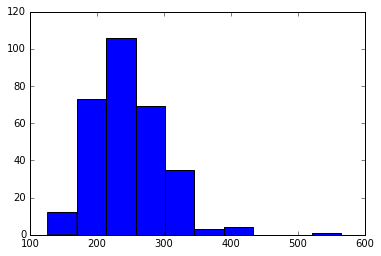

In [29]:
plt.hist(getListForHistogramAndBoxPlot(df_data_1,spark))
plt.show()

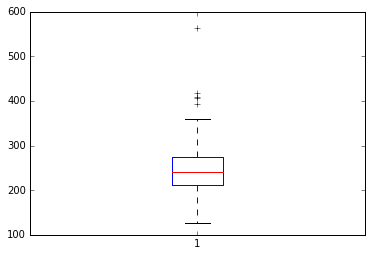

In [30]:
plt.boxplot(getListForHistogramAndBoxPlot(df_data_1,spark))
plt.show()

In [83]:
result=spark.sql("select chol from people where chol is not null")
list(result)

[Column<chol>]

In [95]:
isinstance(getListForHistogramAndBoxPlot(df_data_1,spark),list)

True

In [113]:
isinstance(df_data_1.select('age').show(),list)

+---+
|age|
+---+
| 63|
| 37|
| 41|
| 56|
| 57|
| 57|
| 56|
| 44|
| 52|
| 57|
| 54|
| 48|
| 49|
| 64|
| 58|
| 50|
| 58|
| 66|
| 43|
| 69|
+---+
only showing top 20 rows



False

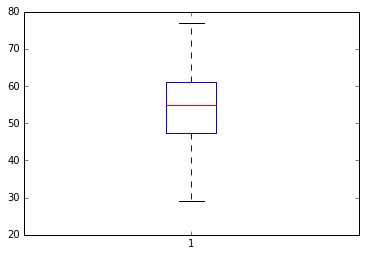

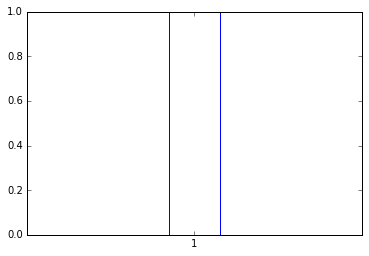

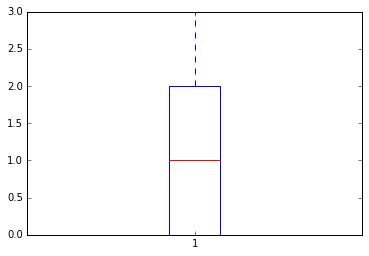

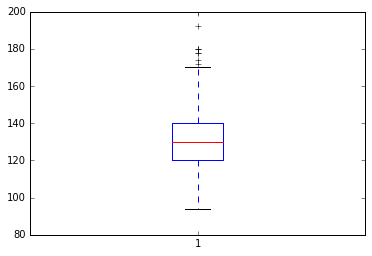

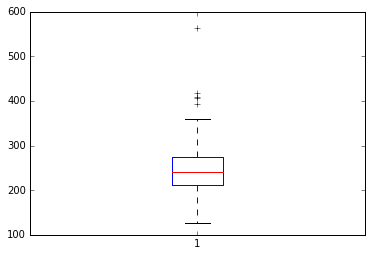

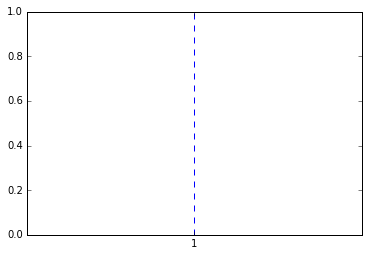

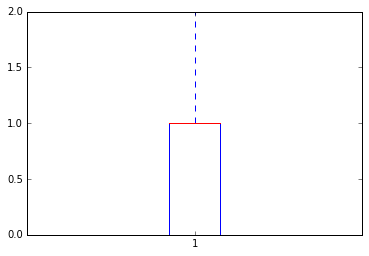

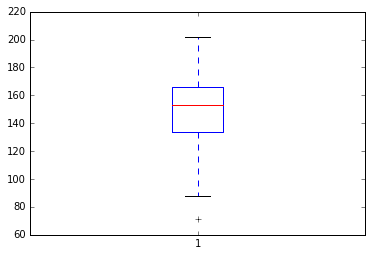

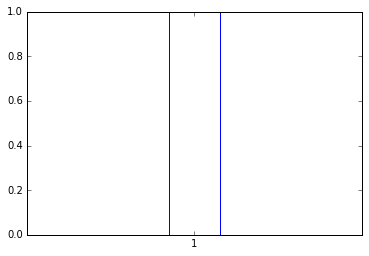

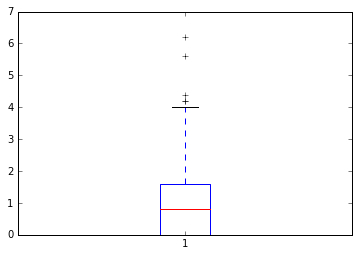

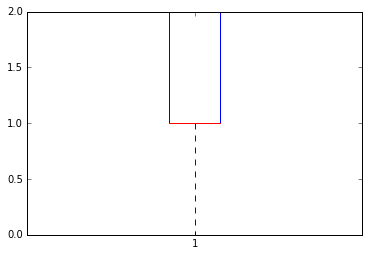

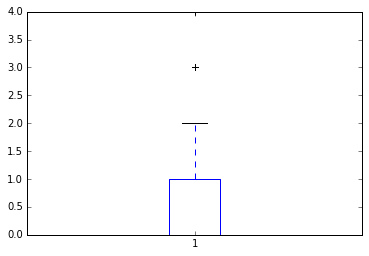

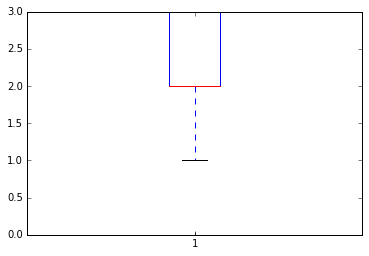

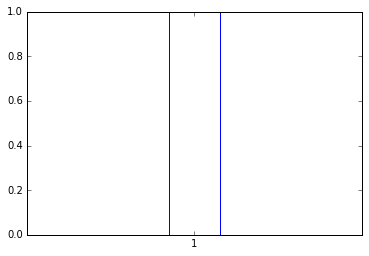

In [129]:
my_cols=df_data_1.columns
for i in range(len(df_data_1.columns)):
    col=my_cols[i]
    y=df_data_1.select(col).rdd.flatMap(lambda x: x).collect()
    plt.boxplot(y)
    plt.show()

In [125]:
isinstance(list1,list)

True